In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./cwru_train.csv',header=None)
df_test = pd.read_csv('./cwru_test.csv',header=None)

In [3]:
df_train.shape, df_test.shape

((14000, 785), (14000, 785))

In [4]:
train_data = df_train.to_numpy()
test_data = df_test.to_numpy()

In [5]:
train_data.shape, test_data.shape

((14000, 785), (14000, 785))

In [6]:
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

In [7]:
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

In [ ]:
X_train[0],y_train[0] #8.0

In [ ]:
X_test[0],y_test[0] #8.0

<BarContainer object of 10 artists>

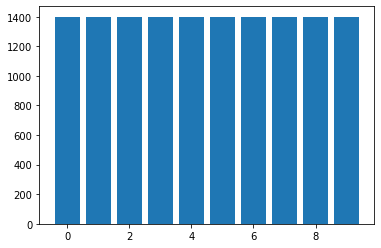

In [9]:
train_data_by_label = {}
for i in set(y_train):
    train_data_by_label[i] = []
for i, item in enumerate(y_train):
    train_data_by_label[item].append(X_train[i].tolist())

plt.bar(x=list(train_data_by_label.keys()), height=[len(train_data_by_label[key]) for key in train_data_by_label.keys()])

In [10]:
NUM_USER = 50
NUM_LABEL_PER_USER = 2
NUM_LABEL = 10
INTERVAL = int(NUM_USER*NUM_LABEL_PER_USER/NUM_LABEL)
INTERVAL

10

In [13]:
np.random.seed(0)
range_in_label = []

for i in range(NUM_LABEL):
    tmp = []
    total = len(train_data_by_label[i])
    for j in range(INTERVAL-1):
        val = np.random.randint(total//(INTERVAL + 1), total//2)
        tmp.append(val)
        total -= val
    tmp.append(total)
    range_in_label.append(tmp)

range_in_label

[[686, 181, 240, 93, 85, 49, 15, 23, 7, 21],
 [197, 581, 144, 183, 84, 84, 49, 14, 28, 36],
 [301, 187, 419, 209, 50, 98, 20, 19, 28, 69],
 [242, 569, 250, 109, 67, 78, 25, 8, 21, 31],
 [274, 500, 241, 162, 52, 46, 21, 32, 9, 63],
 [637, 252, 74, 73, 161, 18, 52, 65, 11, 57],
 [677, 309, 54, 111, 26, 62, 72, 39, 5, 45],
 [448, 143, 364, 142, 146, 25, 58, 24, 4, 46],
 [525, 178, 116, 192, 156, 63, 83, 13, 10, 64],
 [174, 238, 220, 249, 125, 178, 39, 74, 32, 71]]

In [14]:
flag = True
for i in range_in_label[1]:
    if flag:
        flag=False
        continue
    for j in range_in_label[2]:
        print(f"{i} + {j} = {i+j}")
    print()

581 + 301 = 882
581 + 187 = 768
581 + 419 = 1000
581 + 209 = 790
581 + 50 = 631
581 + 98 = 679
581 + 20 = 601
581 + 19 = 600
581 + 28 = 609
581 + 69 = 650

144 + 301 = 445
144 + 187 = 331
144 + 419 = 563
144 + 209 = 353
144 + 50 = 194
144 + 98 = 242
144 + 20 = 164
144 + 19 = 163
144 + 28 = 172
144 + 69 = 213

183 + 301 = 484
183 + 187 = 370
183 + 419 = 602
183 + 209 = 392
183 + 50 = 233
183 + 98 = 281
183 + 20 = 203
183 + 19 = 202
183 + 28 = 211
183 + 69 = 252

84 + 301 = 385
84 + 187 = 271
84 + 419 = 503
84 + 209 = 293
84 + 50 = 134
84 + 98 = 182
84 + 20 = 104
84 + 19 = 103
84 + 28 = 112
84 + 69 = 153

84 + 301 = 385
84 + 187 = 271
84 + 419 = 503
84 + 209 = 293
84 + 50 = 134
84 + 98 = 182
84 + 20 = 104
84 + 19 = 103
84 + 28 = 112
84 + 69 = 153

49 + 301 = 350
49 + 187 = 236
49 + 419 = 468
49 + 209 = 258
49 + 50 = 99
49 + 98 = 147
49 + 20 = 69
49 + 19 = 68
49 + 28 = 77
49 + 69 = 118

14 + 301 = 315
14 + 187 = 201
14 + 419 = 433
14 + 209 = 223
14 + 50 = 64
14 + 98 = 112
14 + 20 = 34
14 

In [15]:
np.random.seed(10)
all_user = {}
flag1 = [0]*NUM_LABEL
flag2 = [0]*NUM_LABEL
available_label = set(list(range(NUM_LABEL)))

for i in range(NUM_USER):
    all_user[str(i)] = {}
    
    labels = np.random.choice(a=list(available_label), size=(NUM_LABEL_PER_USER,), replace=False)
    for label in labels:
        tmp = flag1[label]
        tmp_ = tmp + range_in_label[label][flag2[label]]
        all_user[str(i)][int(label)] = train_data_by_label[label][tmp:tmp_]
        flag1[label] = tmp_
        flag2[label] += 1
        if flag2[label] == INTERVAL:
            available_label.remove(label)

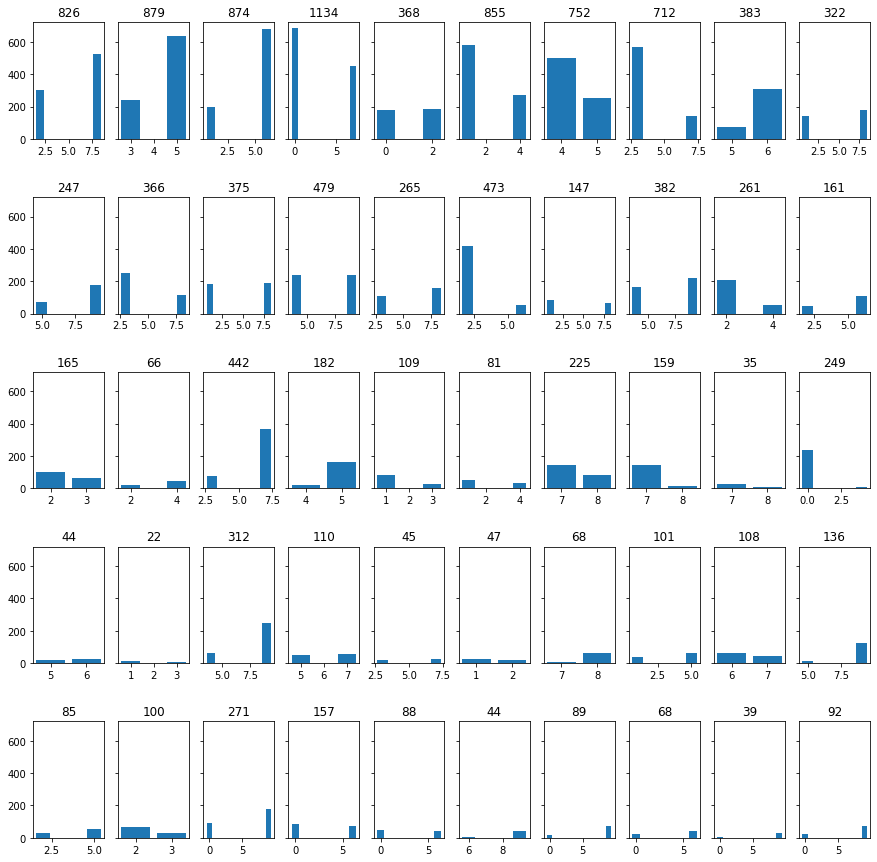

In [16]:
def check(all_client):
    fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(15, 15), sharey=True)
    fig.subplots_adjust(hspace=0.5)

    for i, key in enumerate(all_client.keys()):
#         print(key, len(all_client[key]))
#         for j in all_client[key].keys():
#             print(f'{j}: {len(all_client[key][j])}', end=' ')
#         print('\n')

        x = list(all_client[key].keys())
        y = [len(all_client[key][t]) for t in all_client[key].keys()]
        axes[int(i/10), int(i % 10)].bar(x=x, height=y)
        axes[int(i/10), int(i%10)].set_title(sum(y))

check(all_user)

In [ ]:
def train_data_write_to_file(client_dict: dict):
    all_train_data = {}
    all_test_data = {}

    users = list(client_dict.keys())
    all_train_data['users'] = users
    all_test_data['users'] = users

    num_train_samples = []
    num_test_samples = []
    train_user_data = {}
    test_user_data = {}
    for user in users:
        train_user_data[user] = {}
        test_user_data[user] = {}

        train_user_data[user]['x'] = []
        train_user_data[user]['y'] = []
        test_user_data[user]['x'] = []
        test_user_data[user]['y'] = []

        for key in client_dict[user].keys():
            len_x = len(client_dict[user][key])
            p = int(0.75*len_x)

            train_user_data[user]['x'].extend(client_dict[user][key][:p])
            train_user_data[user]['y'].extend([key]*p)

            test_user_data[user]['x'].extend(client_dict[user][key][p:])
            test_user_data[user]['y'].extend([key]*(len_x - p))

        num_train_samples.append(len(train_user_data[user]['y']))
        num_test_samples.append(len(test_user_data[user]['y']))

    all_train_data['num_samples'] = num_train_samples
    all_test_data['num_samples'] = num_test_samples
    all_train_data['user_data'] = train_user_data
    all_test_data['user_data'] = test_user_data

    with open('./train_json/train.json', 'w') as outfile:
        json.dump(all_train_data, outfile)
    with open('./test_json/test.json', 'w') as outfile:
        json.dump(all_test_data, outfile)

write_to_file(all_user)